In [2]:
# 科学计算模块
import numpy as np
import pandas as pd

# 绘图模块
import matplotlib as mpl
import matplotlib.pyplot as plt

### 手动生成数据

In [3]:
num_inputs = 2           # 两个特征
num_examples = 1000       # 总共一千条数据

In [4]:
# random用法
np.random.seed(24)       # 设置随机数种子（保证每次随机的内容都一样）
np.random.randn(2, 2)    # 设置2行2列随机数组

array([[ 1.32921217, -0.77003345],
       [-0.31628036, -0.99081039]])

In [5]:
# 线性方程系数
w_true = np.array([2, -1]).reshape(-1, 1) # -1：自动判断
b_true = np.array(1)

# 扰动项相关
delta = 0.01

# 创建数据集的特征和标签取值
features = np.random.randn(num_examples, num_inputs)
labels_true = features.dot(w_true) + b_true
labels = labels_true + np.random.normal(size = labels_true.shape) * delta

In [6]:
features

array([[-1.07081626, -1.43871328],
       [ 0.56441685,  0.29572189],
       [-1.62640423,  0.2195652 ],
       ...,
       [-1.44029131,  0.50439425],
       [ 0.96604603,  1.76623359],
       [ 0.57852053, -1.34028424]])

In [7]:
labels_true

array([[ 2.97080769e-01],
       [ 1.83311182e+00],
       [-2.47237367e+00],
       [ 4.68336867e-01],
       [ 2.81906560e+00],
       [-8.12559166e-01],
       [ 2.84911190e+00],
       [ 8.16104836e-01],
       [-2.23673251e+00],
       [ 3.84903763e+00],
       [ 3.57341849e-02],
       [-6.31876174e-01],
       [ 6.71457939e-01],
       [-2.91185026e-01],
       [ 5.69912892e+00],
       [ 5.94732168e+00],
       [ 1.08837176e-01],
       [-4.63796210e-01],
       [ 3.23817195e+00],
       [-3.74448288e+00],
       [ 2.94300273e+00],
       [ 9.09452631e-01],
       [-1.86514513e+00],
       [ 3.34061566e+00],
       [ 2.82759572e+00],
       [-2.68017804e-01],
       [ 1.18081099e+00],
       [-5.77104701e-01],
       [-1.86902545e-01],
       [ 4.59659037e+00],
       [ 2.91058551e+00],
       [-2.92879416e+00],
       [-2.24480799e+00],
       [ 7.42354926e-01],
       [ 4.96769843e-01],
       [-8.56161409e-01],
       [ 2.33995763e+00],
       [-2.68636701e+00],
       [-2.0

In [8]:
features[:10]

array([[-1.07081626, -1.43871328],
       [ 0.56441685,  0.29572189],
       [-1.62640423,  0.2195652 ],
       [ 0.6788048 ,  1.88927273],
       [ 0.9615384 ,  0.1040112 ],
       [-0.48116532,  0.85022853],
       [ 1.45342467,  1.05773744],
       [ 0.16556161,  0.51501838],
       [-1.33693569,  0.56286114],
       [ 1.39285483, -0.06332798]])

In [9]:
labels[:10]

array([[ 0.29161817],
       [ 1.83851813],
       [-2.46058022],
       [ 0.44394438],
       [ 2.8133944 ],
       [-0.8109745 ],
       [ 2.85143778],
       [ 0.83156296],
       [-2.22624102],
       [ 3.84279053]])

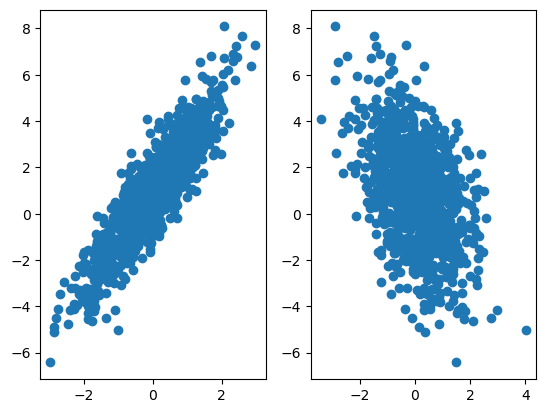

In [10]:
plt.subplot(121)
plt.scatter(features[:,0], labels) # 第一个特征和标签的关系
plt.subplot(122)
plt.scatter(features[:,1], labels) # 第二个特征和标签的关系

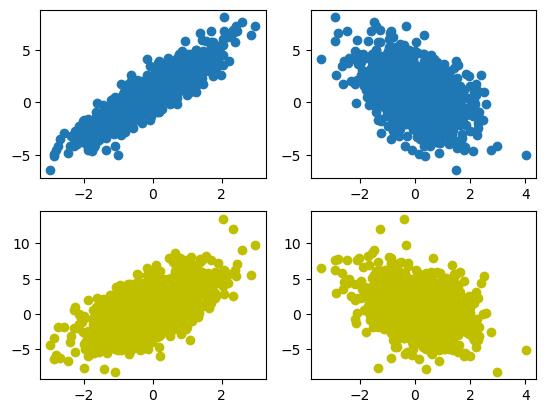

In [11]:
# 设置随机数种子
np.random.seed(24)

# 修改因变量
labels1 = labels_true + np.random.normal(size = labels_true.shape) * 2

# 可视化展示

# 扰动较小的情况
plt.subplot(221)
plt.scatter(features[:, 0], labels)        # 第一个特征和标签的关系
plt.subplot(222)
plt.scatter(features[:, 1], labels)           # 第二个特征和标签的关系

# 扰动较大的情况
plt.subplot(223)
plt.plot(features[:, 0], labels1, 'yo') # 第一个特征和标签的关系
plt.subplot(224)
plt.plot(features[:, 1], labels1, 'yo')    # 第二个特征和标签的关系

### 非线性关系数据集

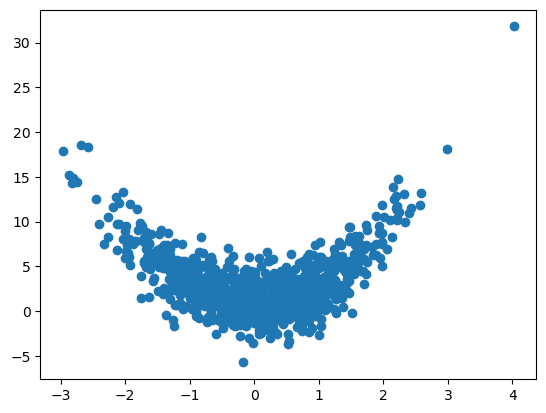

In [12]:
# 设置随机数种子
np.random.seed(24)

num_inputs = 1               # 一个特征
num_examples = 1000          # 总共一千条数据

# 线性方程系数
w_true = np.array(2)
b_true = np.array(1)

# 扰动项
delta = 2

# 特征和标签取值
features = np.random.randn(num_examples, num_inputs)
labels_true = np.power(features, 2) * w_true + b_true
labels = labels_true + np.random.normal(size = labels_true.shape) * delta

# 可视化展示
plt.scatter(features, labels)

### 生成函数

In [ ]:
# 默认创建一个 y = 2x_1 - x_2 + 1 的数据集
def arrayGenReg(num_examples = 1000, w = [2, -1, 1], bias = True, delta = 0.01, deg = 1):
    """回归类数据集创建函数
    :param num_examples: 数据集样本数
    :param w: 线性方程系数
    :param bias: 是否包含截距
    :param delta: 扰动项大小
    :param deg: 多项式的最高次数
    :return: features, labels
    例子：
    features, labels = arrayGenReg(num_examples = 1000, w = [2, -1, 1], bias = True, delta = 0.01, deg = 1)
    生成一个包含1000个样本，3个特征（2个线性特征和1个截距）的线性回归数据集
    features, labels = arrayGenReg(num_examples = 1000, w = [2, -1, 1], bias = True, delta = 2, deg = 2)
    生成一个包含1000个样本，3个特征（2个二次特征和1个截距）的二次回归数据集
    """
    if bias == False:
        num_inputs = len(w)
        features = np.random.randn(num_examples, num_inputs)
        w_true = np.array(w).reshape(-1, 1)
        labels_true = np.power(features, deg).dot(w_true)
        print(features[:10])
    else:
        num_inputs = len(w) - 1
        features_true = np.random.randn(num_examples, num_inputs)
        w_true = np.array(w[:-1]).reshape(-1, 1)
        b_true = np.array(w[-1])
        labels_true = np.power(features_true, deg).dot(w_true) + b_true
        features = np.concatenate((features_true, np.ones_like(labels_true)), axis=1)
        # print(features_true[:10])
        # print(features[:10])
    labels = labels_true + np.random.normal(size = labels_true.shape) * delta

    return features, labels

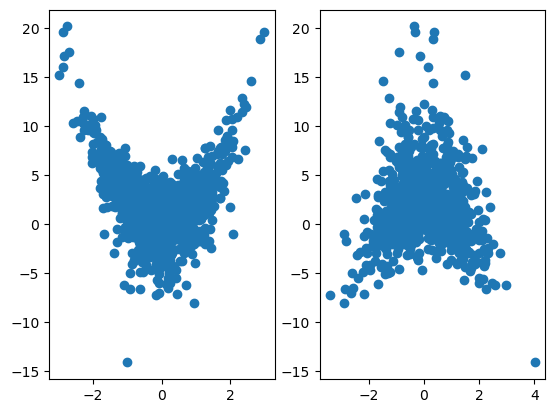

In [14]:
# 设置随机数种子
np.random.seed(24)

# 较小扰动值
# f, l = arrayGenReg(delta=0.01)
# 较大扰动值
# f, l = arrayGenReg(delta=2)
# 最高次项为2
# f, l = arrayGenReg(deg=2)
# 最高次项为2,较大扰动值
f, l = arrayGenReg(deg=2, delta=2)

# 绘制图像查看结果
plt.subplot(121)
plt.scatter(f[:, 0], l)             # 第一个特征和标签的关系
plt.subplot(122)
plt.scatter(f[:, 1], l)             # 第二个特征和标签的关系

### 模块引入

In [61]:
from ML_basic_function import *

arrayGenReg?

Signature: arrayGenReg(num_examples=1000, w=[2, -1, 1], bias=True, delta=0.01, deg=1)
Docstring:
回归类数据集创建函数
:param num_examples: 数据集样本数
:param w: 线性方程系数
:param bias: 是否包含截距
:param delta: 扰动项大小
:param deg: 多项式的最高次数
:return: features, labels
例子：
features, labels = arrayGenReg(num_examples = 1000, w = [2, -1, 1], bias = True, delta = 0.01, deg = 1)
生成一个包含1000个样本，3个特征（2个线性特征和1个截距）的线性回归数据集
features, labels = arrayGenReg(num_examples = 1000, w = [2, -1, 1], bias = True, delta = 2, deg = 2)
生成一个包含1000个样本，3个特征（2个二次特征和1个截距）的二次回归数据集

默认创建一个 y = 2x_1 - x_2 + 1 的数据集
File:      ~/Desktop/教学/mllearn-course/3-linear/ML_basic_function.py
Type:      function

In [62]:
arrayGenReg()

(array([[ 2.39339976,  0.42787235,  1.        ],
        [ 1.4048778 ,  1.50843313,  1.        ],
        [-1.45316016,  0.53293419,  1.        ],
        ...,
        [ 0.8071079 , -0.16608564,  1.        ],
        [ 0.2096317 , -1.74789731,  1.        ],
        [-0.62023354,  1.27240607,  1.        ]]),
 array([[ 5.35899444e+00],
        [ 2.30172925e+00],
        [-2.44167860e+00],
        [ 9.60170244e-01],
        [-3.31728448e+00],
        [ 3.73856972e+00],
        [-2.67234838e+00],
        [ 1.55031513e+00],
        [-2.11560624e+00],
        [ 3.71970288e+00],
        [ 3.20921458e+00],
        [ 7.16702337e-03],
        [-1.41655992e+00],
        [ 2.00824696e+00],
        [ 1.51607000e+00],
        [ 3.03598344e-01],
        [ 1.22024214e+00],
        [ 1.08955249e+00],
        [-3.45676060e-01],
        [ 1.20775798e+00],
        [-1.27536104e+00],
        [ 2.33512197e+00],
        [-9.07560790e-01],
        [ 2.58941101e+00],
        [ 2.13599522e+00],
        [-2.2262